In [1]:
import pandas as pd
import numpy as np
CPI = pd.read_excel("datasets/Energy-CPI.xlsx", sheet_name="CPI")

In [2]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CPI                 400 non-null    float64
 1   Solid Fuels         400 non-null    float64
 2   Gas                 400 non-null    float64
 3   Electricity         400 non-null    float64
 4   Liquid Fuels        400 non-null    float64
 5   Motor fuel and oil  400 non-null    float64
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          1 non-null      object 
dtypes: float64(8), object(1)
memory usage: 28.2+ KB


In [3]:
CPI=CPI.dropna(axis=1)
CPI.head()

,CPI,Solid Fuels,Gas,Electricity,Liquid Fuels,Motor fuel and oil
0,53.637,37.003405,36.411609,49.039693,35.077678,31.965649
1,53.954,37.003405,36.411609,49.039693,31.071137,31.870229
2,54.217,37.116913,36.807388,49.039693,28.863451,31.870229
3,55.211,37.116913,37.730871,49.551857,29.272281,34.160305
4,55.735,35.187287,38.654354,51.344430,28.863451,34.064885


In [4]:
corr_matrix = CPI.corr()
corr_matrix["CPI"].sort_values(ascending=False)

CPI                   1.000000
Solid Fuels           0.980760
Motor fuel and oil    0.943426
Electricity           0.922629
Gas                   0.907724
Liquid Fuels          0.853407
Name: CPI, dtype: float64

array([[<Axes: xlabel='CPI', ylabel='CPI'>,
        <Axes: xlabel='Electricity', ylabel='CPI'>,
        <Axes: xlabel='Gas', ylabel='CPI'>,
        <Axes: xlabel='Liquid Fuels', ylabel='CPI'>,
        <Axes: xlabel='Solid Fuels', ylabel='CPI'>,
        <Axes: xlabel='Motor fuel and oil', ylabel='CPI'>],
       [<Axes: xlabel='CPI', ylabel='Electricity'>,
        <Axes: xlabel='Electricity', ylabel='Electricity'>,
        <Axes: xlabel='Gas', ylabel='Electricity'>,
        <Axes: xlabel='Liquid Fuels', ylabel='Electricity'>,
        <Axes: xlabel='Solid Fuels', ylabel='Electricity'>,
        <Axes: xlabel='Motor fuel and oil', ylabel='Electricity'>],
       [<Axes: xlabel='CPI', ylabel='Gas'>,
        <Axes: xlabel='Electricity', ylabel='Gas'>,
        <Axes: xlabel='Gas', ylabel='Gas'>,
        <Axes: xlabel='Liquid Fuels', ylabel='Gas'>,
        <Axes: xlabel='Solid Fuels', ylabel='Gas'>,
        <Axes: xlabel='Motor fuel and oil', ylabel='Gas'>],
       [<Axes: xlabel='CPI', ylabel='

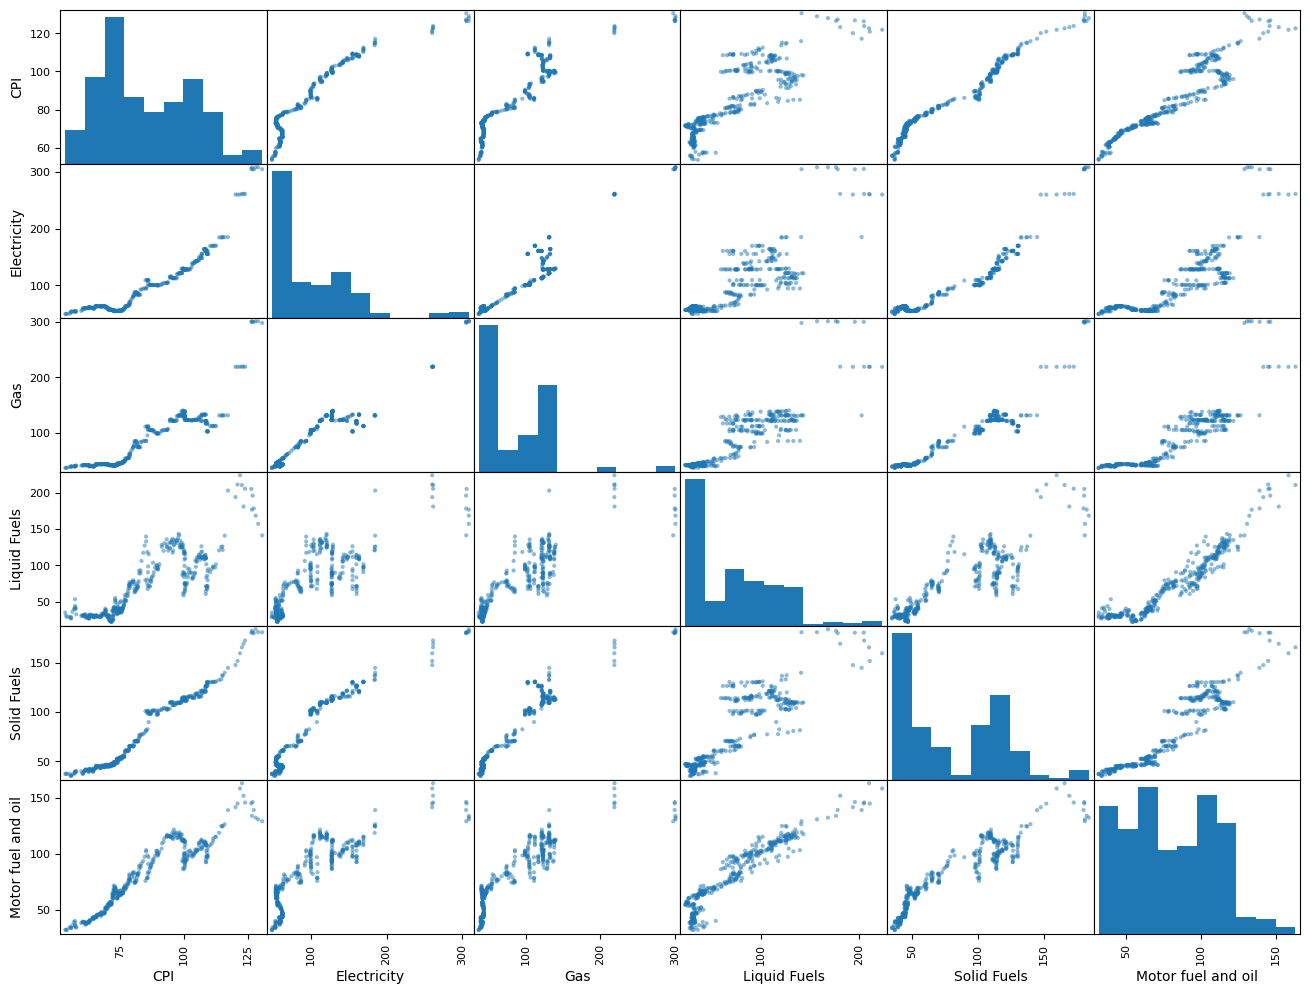

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["CPI", "Electricity", "Gas",
"Liquid Fuels", "Solid Fuels", "Motor fuel and oil" ]
scatter_matrix(CPI[attributes], figsize=(16, 12))

In [6]:
y = CPI["CPI"]
X = CPI.drop(columns = ["CPI"])

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_linear = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_linear, y, test_size = 0.2, random_state = 19)
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     5540.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          8.78e-304
Time:                        06:54:00   Log-Likelihood:                -650.05
No. Observations:                 320   AIC:                             1312.
Df Residuals:                     314   BIC:                             1335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 36.9110      0

In [8]:
y_pred = res.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.977


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [11]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [12]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.457
